In [1]:
#Imports
import requests
from bs4 import BeautifulSoup
from collections import Counter
from string import punctuation

from gensim.parsing.preprocessing import remove_stopwords
from gensim.parsing.preprocessing import strip_numeric
from gensim.parsing.preprocessing import strip_punctuation
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import numpy as np

C:\Users\Lucas\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
#Parseo la página
# We get the url
r = requests.get("https://infovis-wiki.net/wiki/Information_Visualization")
soup = BeautifulSoup(r.content)

# We get the words within paragrphs
text_p = (''.join(s.findAll(text=True))for s in soup.findAll('p'))
c_p = Counter((x.rstrip(punctuation).lower() for y in text_p for x in y.split()))

# We get the words within divs
text_div = (''.join(s.findAll(text=True))for s in soup.findAll('div'))
c_div = Counter((x.rstrip(punctuation).lower() for y in text_div for x in y.split()))

# We sum the two countesr and get a list with words count from most to less common
total = c_div + c_p
list_most_common_words = total.most_common()

In [3]:
#Creo el texto
text= ""
for word in list_most_common_words:
    text+= word[0]+ " "

In [4]:
#Filtro el texto
filtered_sentence = strip_numeric(text)
filtered_sentence = strip_punctuation(filtered_sentence)
filtered_sentence = remove_stopwords(filtered_sentence)

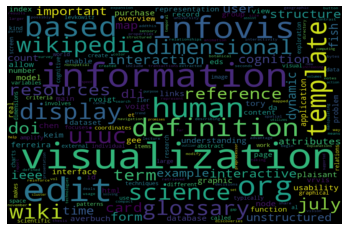

In [5]:
# Create and generate a word cloud image:
wordcloud = WordCloud(height=600, width=800).generate(filtered_sentence)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear', aspect='auto')
plt.axis("off")
plt.show()

In [7]:
wordcloud.to_file(".\wordcloud.png")